In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import peakutils

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns =["Current (in 10e-7 A)", "Voltage in V"]

In [4]:
df

,Current (in 10e-7 A),Voltage in V
0,0.00,1
1,0.00,2
2,0.00,3
3,0.00,4
4,0.00,5
...,...,...
86,0.86,87
87,0.90,88
88,0.90,89
89,0.86,90


In [5]:
df.to_html("data.html", index=False)

In [6]:
df = pd.read_csv("FH.csv")
df["Voltage"] = np.arange(1,92)
df.columns = ["Current", "Voltage"]

currents = list(df["Current"])
voltages = list(df["Voltage"])

In [3]:
df.to_csv("data.csv", index = False)

In [7]:

maxima = peakutils.indexes(currents)
# maxima =maxima

In [8]:
max_currents = df['Current'][maxima]
volt_max = maxima
volt_max

array([30, 41, 52, 63, 75, 87], dtype=int64)

C:\Users\kul78\AppData\Local\Temp/ipykernel_8788/1096231510.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpp" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "plot.jpg", dpp = 144);


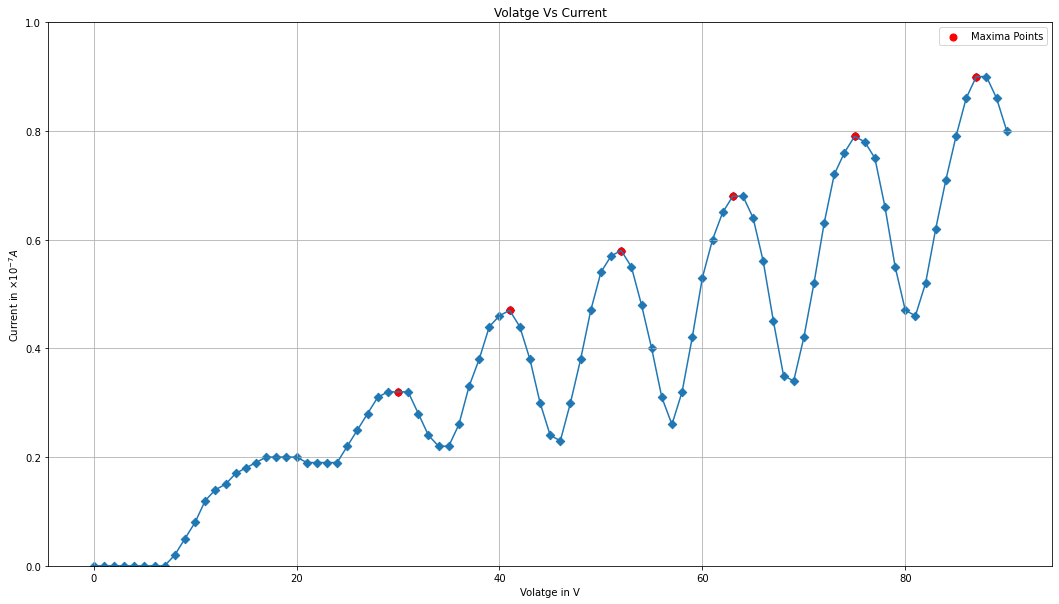

In [19]:
plt.figure(figsize=(18, 10))
plt.plot(df["Voltage"]-1, df["Current"])
plt.scatter(df["Voltage"]-1, df["Current"], marker="D")
plt.scatter(volt_max, max_currents, s = 50, c="red", label = "Maxima Points")
plt.grid()
plt.title("Volatge Vs Current")
plt.xlabel("Volatge in V")
plt.legend()
plt.ylabel(r"Current in $\times 10^{-7}A$")
plt.ylim([0, 1])
plt.savefig(fname = "plot.jpg", dpp = 144);

In [40]:
volatges_diff = []
for i in range(1, len(maxima)):
    volatges_diff.append(maxima[i]-maxima[i-1])

In [42]:
np.mean(volatges_diff)

11.4

In [49]:
from scipy import interpolate

In [52]:
inter = interpolate.interp1d(voltages, currents, kind = "cubic", )

In [56]:
inter.x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91])

In [58]:
x_new = np.linspace(1, 90, 1000)
y_new = inter(x_new)

In [66]:

maxima = peakutils.indexes(y_new)
maxima =maxima
max_currents = y_new
volt_max = x_new[maxima]

In [68]:
maxima

array([326, 344, 459, 582, 713, 844, 982], dtype=int64)

In [69]:
volatges_diff = []
for i in range(1, len(volt_max)):
    volatges_diff.append(volt_max[i]-volt_max[i-1])
np.mean(volatges_diff)

9.740407073740407